In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
plt.rcParams["figure.figsize"] = (15, 10)

In [2]:
df = pd.read_csv('population-growth-rate-with-and-without-migration.csv')
df

,Entity,Code,Year,"Estimates, 1950 - 2020: Annually interpolated demographic indicators - Population growth rate (percentage)","Estimates, 1950 - 2020: Annually interpolated demographic indicators - Rate of natural increase (per 1,000 population)"
0,Afghanistan,AFG,1950,1.129,1.1823
1,Afghanistan,AFG,1951,1.172,1.2238
2,Afghanistan,AFG,1952,1.257,1.3060
3,Afghanistan,AFG,1953,1.339,1.3867
4,Afghanistan,AFG,1954,1.418,1.4659
...,...,...,...,...,...
17461,Zimbabwe,ZWE,2016,1.504,2.4578
17462,Zimbabwe,ZWE,2017,1.435,2.3688
17463,Zimbabwe,ZWE,2018,1.416,2.2793
17464,Zimbabwe,ZWE,2019,1.448,2.1974


In [3]:
df.columns = ['entity', 'code', 'year', 'total', 'no_migration']
df['migration'] = df.total - df.no_migration
current = df[df.year == df.year.max()]

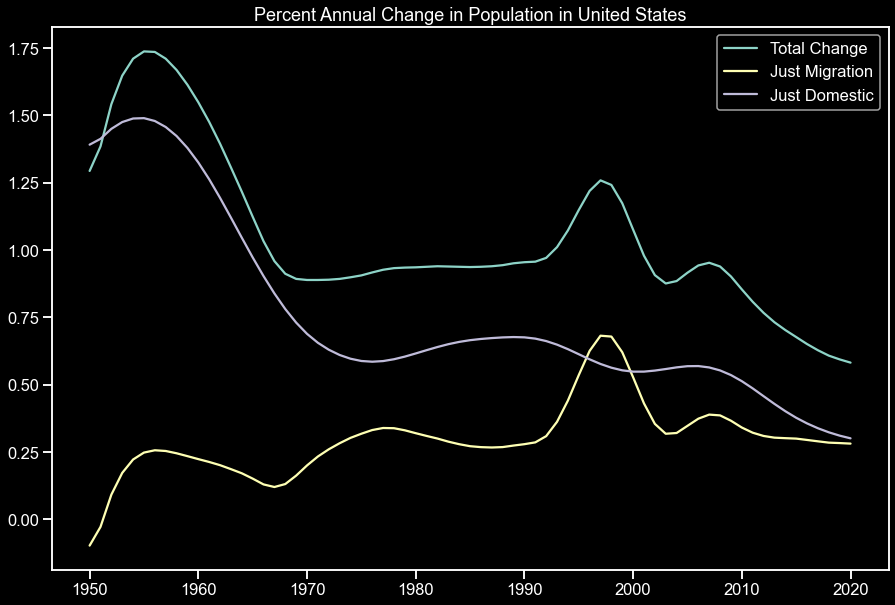

In [4]:
def plot_country(country):
    temp = df[df.entity==country]
    # plot = px.line(temp, x='year', y=['total', 'migration', 'no_migration'])
    plt.plot(temp.year, temp.total, label='Total Change')
    plt.plot(temp.year, temp.migration, label='Just Migration')
    plt.plot(temp.year, temp.no_migration, label='Just Domestic')
    plt.title('Percent Annual Change in Population in ' + country)
    plt.legend()
    # return plot
plot_country('United States')

In [5]:
current

,entity,code,year,total,no_migration,migration
70,Afghanistan,AFG,2020,2.304,2.4995,-0.1955
141,Africa,NaN,2020,2.440,2.4740,-0.0340
212,Albania,ALB,2020,-0.139,0.3190,-0.4580
283,Algeria,DZA,2020,1.784,1.8063,-0.0223
354,Angola,AGO,2020,3.207,3.1994,0.0076
...,...,...,...,...,...,...
17181,Western Sahara,ESH,2020,2.463,1.4515,1.0115
17252,World,OWID_WRL,2020,1.036,1.0362,-0.0002
17323,Yemen,YEM,2020,2.228,2.3328,-0.1048
17394,Zambia,ZMB,2020,2.882,2.9227,-0.0407


In [6]:
current['difference'] = current.migration - current.no_migration

<ipython-input-6-9f354fba8178>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current['difference'] = current.migration - current.no_migration


In [7]:
current

,entity,code,year,total,no_migration,migration,difference
70,Afghanistan,AFG,2020,2.304,2.4995,-0.1955,-2.6950
141,Africa,NaN,2020,2.440,2.4740,-0.0340,-2.5080
212,Albania,ALB,2020,-0.139,0.3190,-0.4580,-0.7770
283,Algeria,DZA,2020,1.784,1.8063,-0.0223,-1.8286
354,Angola,AGO,2020,3.207,3.1994,0.0076,-3.1918
...,...,...,...,...,...,...,...
17181,Western Sahara,ESH,2020,2.463,1.4515,1.0115,-0.4400
17252,World,OWID_WRL,2020,1.036,1.0362,-0.0002,-1.0364
17323,Yemen,YEM,2020,2.228,2.3328,-0.1048,-2.4376
17394,Zambia,ZMB,2020,2.882,2.9227,-0.0407,-2.9634


In [8]:
current.sort_values(by='difference').tail(20)

,entity,code,year,total,no_migration,migration,difference
3833,Czechia,CZE,2020,0.165,-0.0532,0.2182,0.2714
5182,"Europe, Western",NaN,2020,0.276,-0.0047,0.2807,0.2854
15264,Switzerland,CHE,2020,0.717,0.2158,0.5012,0.2854
4827,Estonia,EST,2020,-0.017,-0.1703,0.1533,0.3236
3549,Croatia,HRV,2020,-0.592,-0.4684,-0.1236,0.3448
14767,Southern Europe,NaN,2020,-0.165,-0.2552,0.0902,0.3454
5324,Finland,FIN,2020,0.146,-0.1002,0.2462,0.3464
12708,Portugal,PRT,2020,-0.286,-0.3166,0.0306,0.3472
13631,Serbia,SRB,2020,-0.427,-0.3904,-0.0366,0.3538
2484,Canada,CAN,2020,0.870,0.2420,0.6280,0.3860


In [9]:
current[current.code=='USA']

,entity,code,year,total,no_migration,migration,difference
16471,United States,USA,2020,0.582,0.3008,0.2812,-0.0196


In [10]:
current.sort_values(by='difference').head(20)

,entity,code,year,total,no_migration,migration,difference
11217,Niger,NER,2020,3.759,3.7395,0.0195,-3.7200
14554,South Sudan,SSD,2020,1.423,2.4077,-0.9847,-3.3924
13418,Sao Tome and Principe,STP,2020,1.897,2.6105,-0.7135,-3.3240
9513,Mali,MLI,2020,2.957,3.1393,-0.1823,-3.3216
14199,Somalia,SOM,2020,2.883,3.0906,-0.2076,-3.2982
354,Angola,AGO,2020,3.207,3.1994,0.0076,-3.1918
8377,Lebanon,LBN,2020,-0.635,1.2604,-1.8954,-3.1558
5679,Gambia,GMB,2020,2.881,3.0039,-0.1229,-3.1268
3904,Democratic Republic of Congo,COD,2020,3.120,3.0991,0.0209,-3.0782
15548,Tanzania,TZA,2020,2.924,2.9860,-0.0620,-3.0480


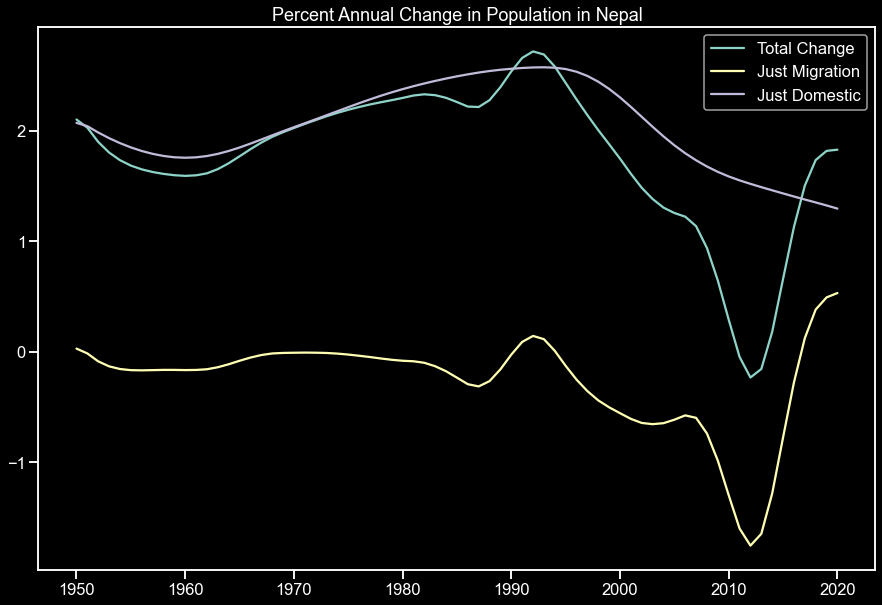

In [11]:
plot_country('Nepal')

<AxesSubplot:>

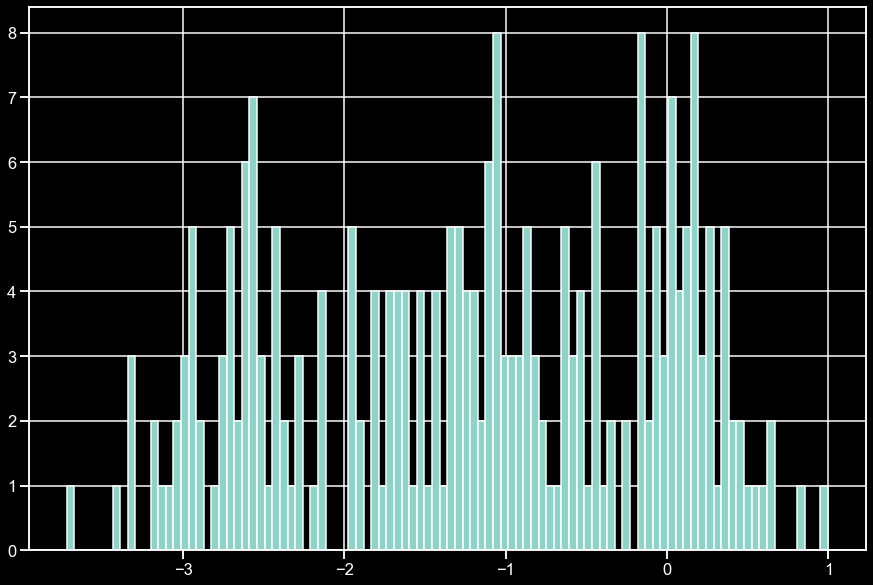

In [12]:
current.difference.hist(bins=100)